In [ ]:
!python -m pip install --upgrade pip
!python -m pip install numpy
!python -m pip install scipy
!python -m pip install matplotlib
!python -m pip install scikit-learn

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC

print("All packages imported successfully!")


All packages imported successfully!


In [12]:
!pip install seaborn


In [13]:
plt.style.use('ggplot')  # guaranteed built-in style



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Use a built-in style
plt.style.use('ggplot')  # or 'bmh'
plt.rcParams['figure.figsize'] = (6,5)

print("Environment ready!")

Environment ready!


Environment ready!


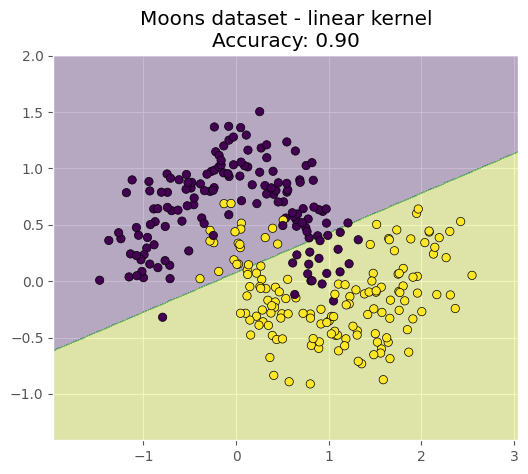

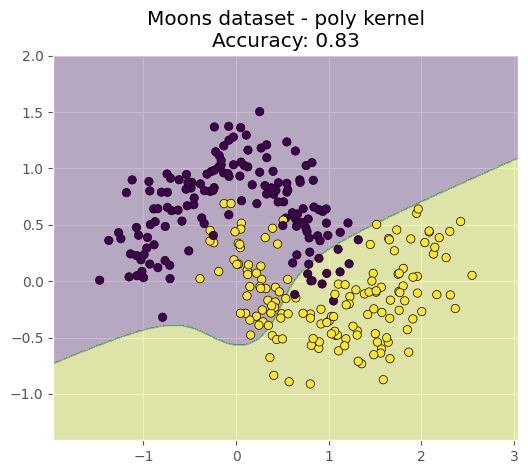

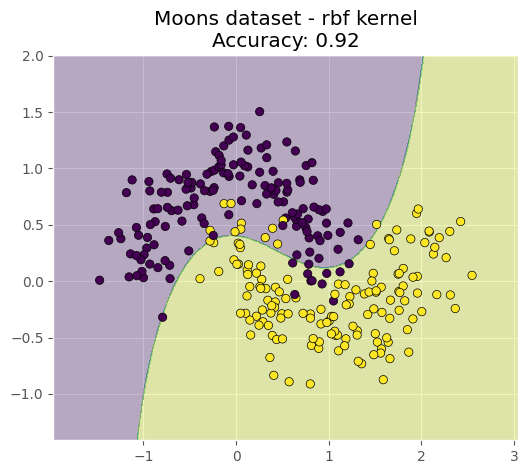

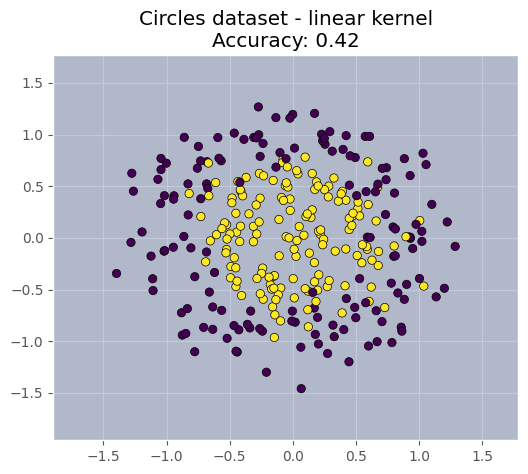

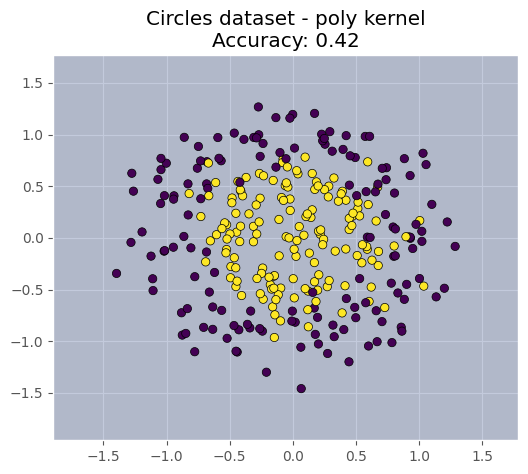

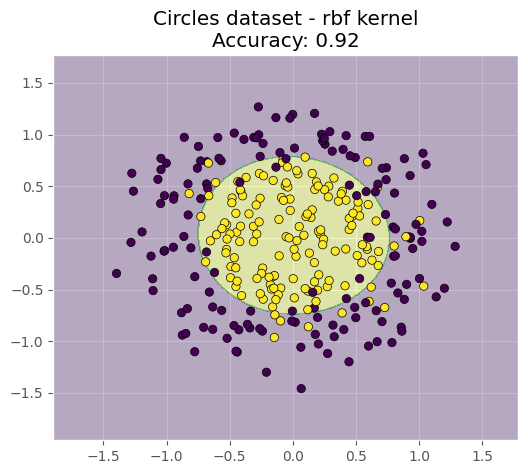

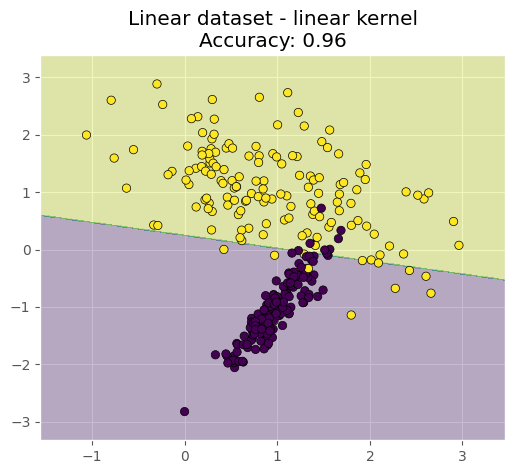

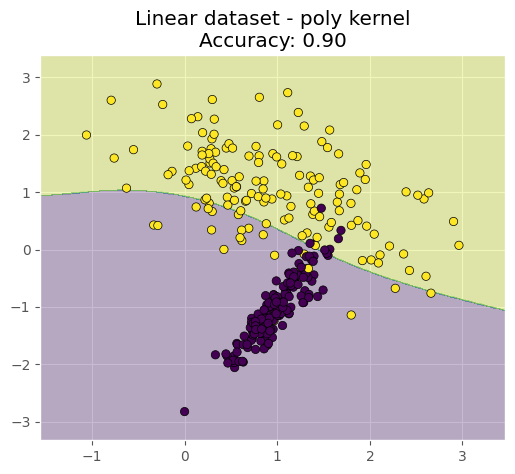

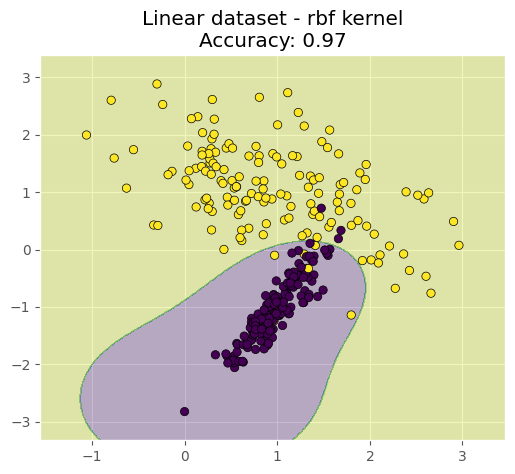

Environment ready!

=== Moons Dataset ===
Linear kernel accuracy: 0.90


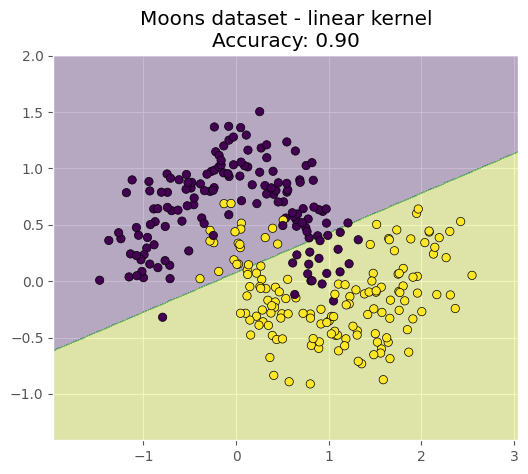

Poly kernel accuracy: 0.83


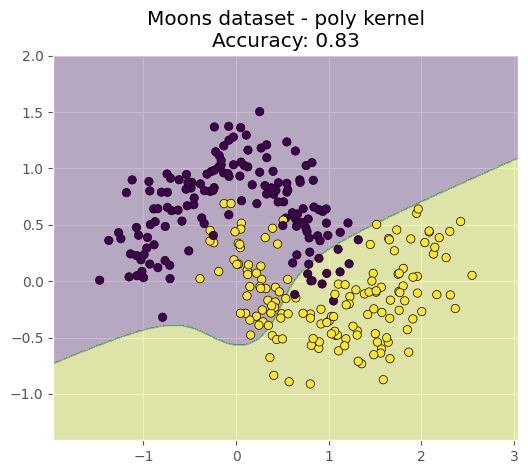

Rbf kernel accuracy: 0.92


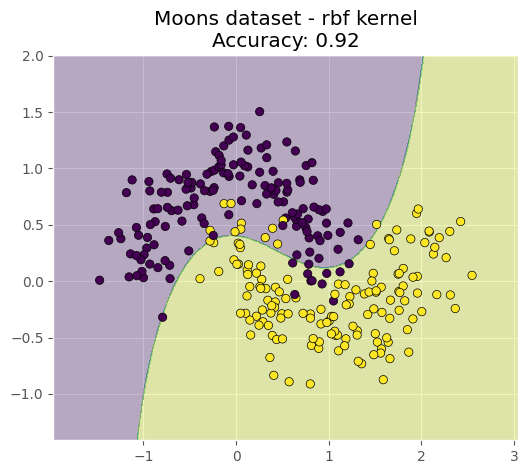


=== Circles Dataset ===
Linear kernel accuracy: 0.42


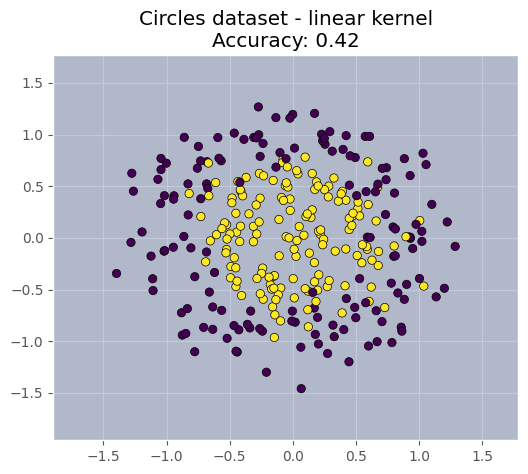

Poly kernel accuracy: 0.42


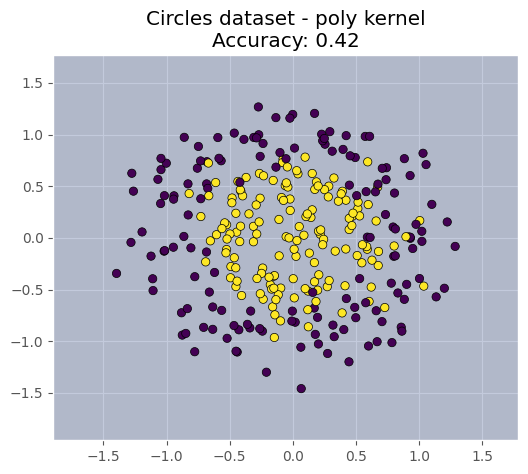

Rbf kernel accuracy: 0.92


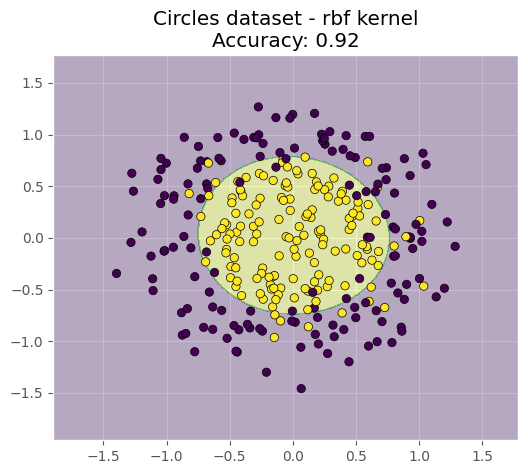


=== Linear Dataset ===
Linear kernel accuracy: 0.96


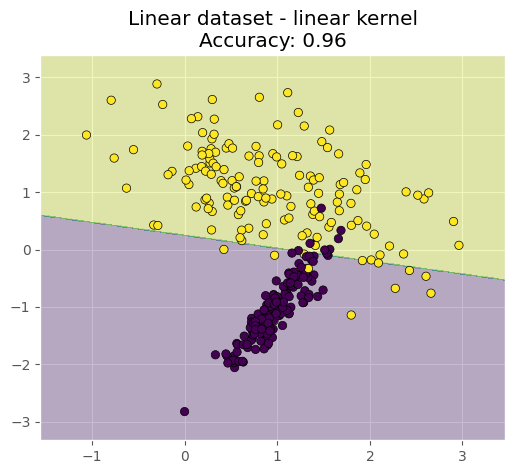

Poly kernel accuracy: 0.90


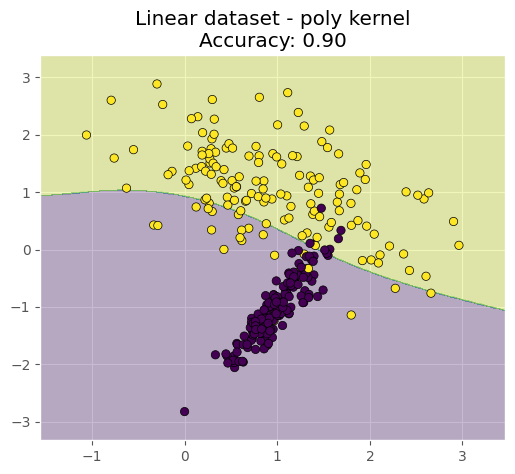

Rbf kernel accuracy: 0.97


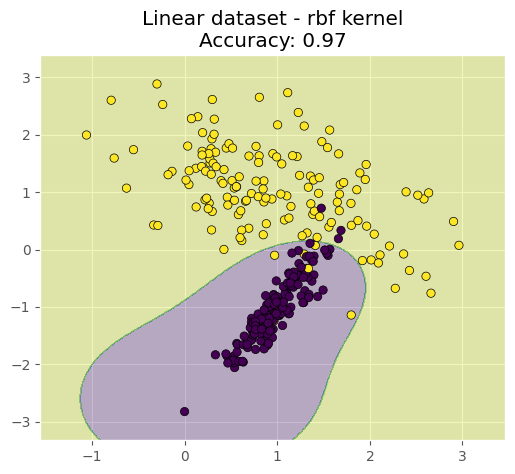

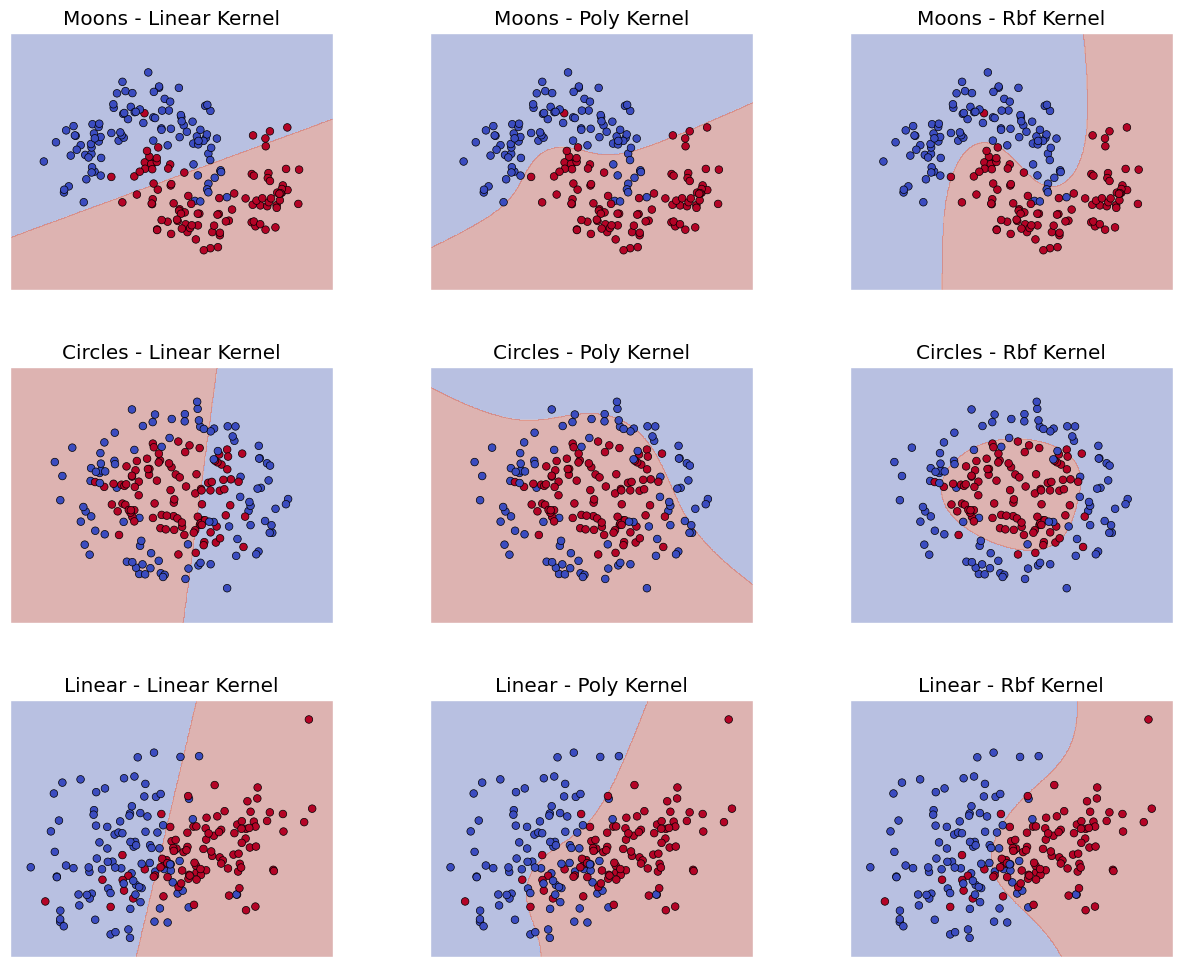

Environment ready!

=== Moons Dataset ===
Linear kernel accuracy: 0.90


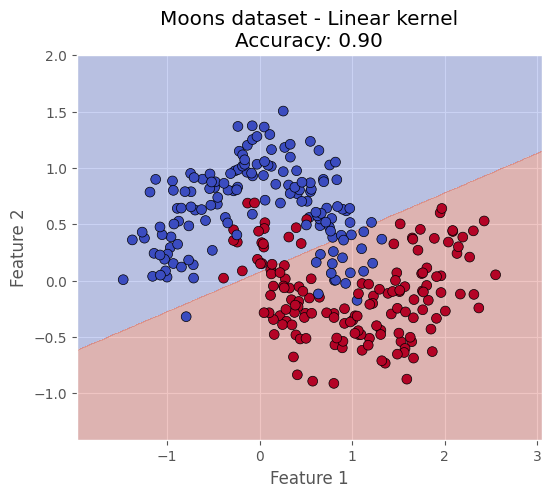

Poly kernel accuracy: 0.91


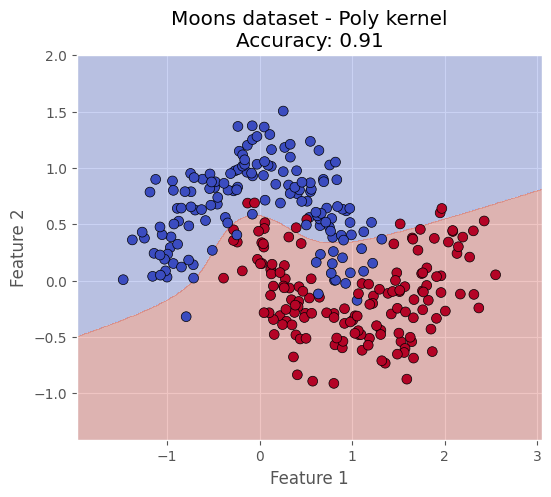

Rbf kernel accuracy: 0.97


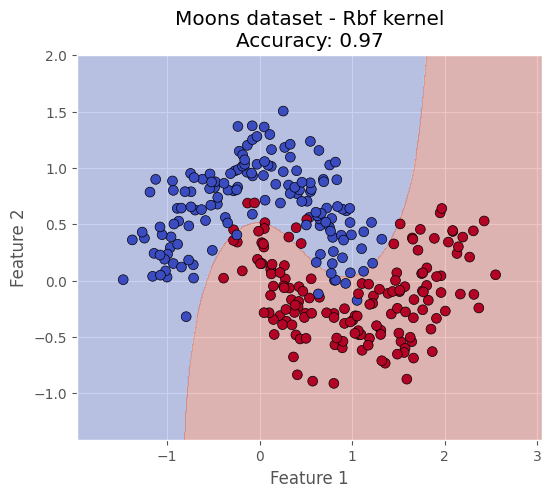


=== Circles Dataset ===
Linear kernel accuracy: 0.42


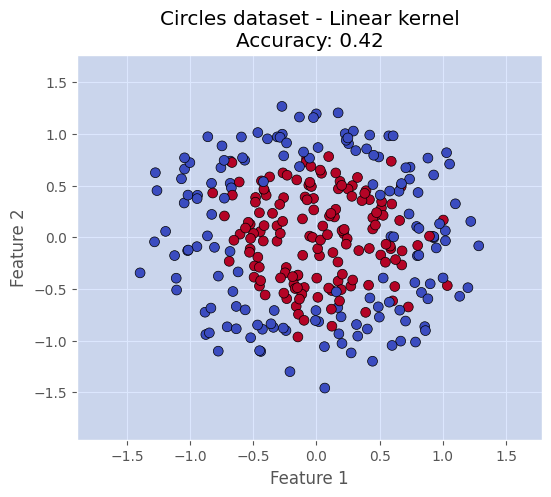

Poly kernel accuracy: 0.42


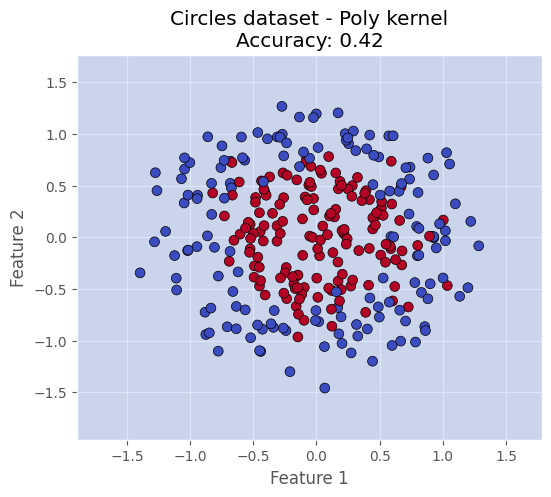

Rbf kernel accuracy: 0.91


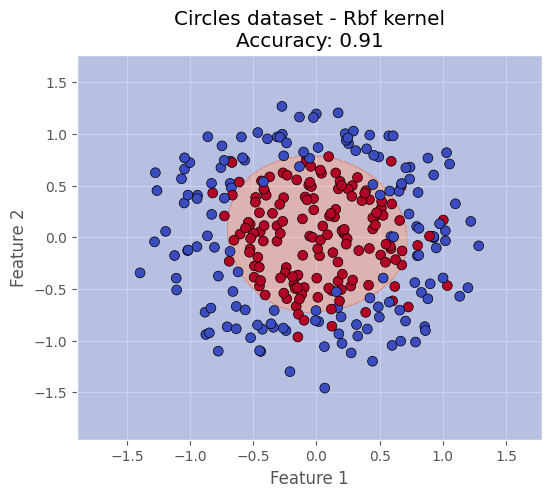


=== Linear Dataset ===
Linear kernel accuracy: 0.96


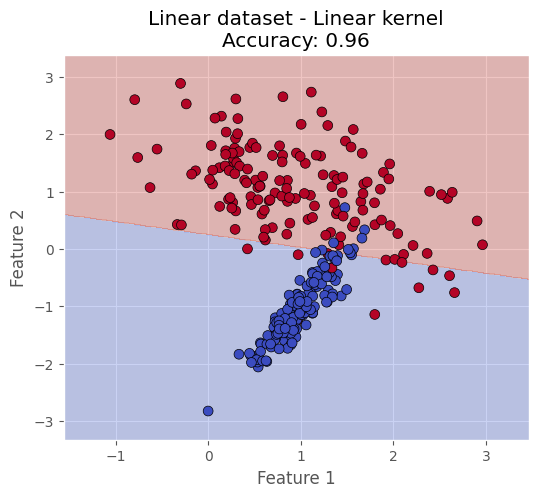

Poly kernel accuracy: 0.90


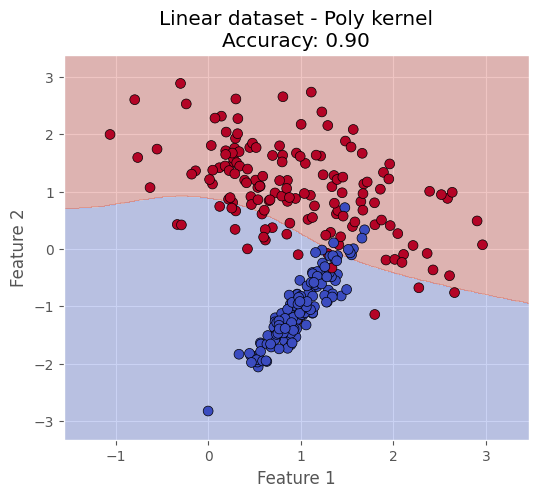

Rbf kernel accuracy: 0.97


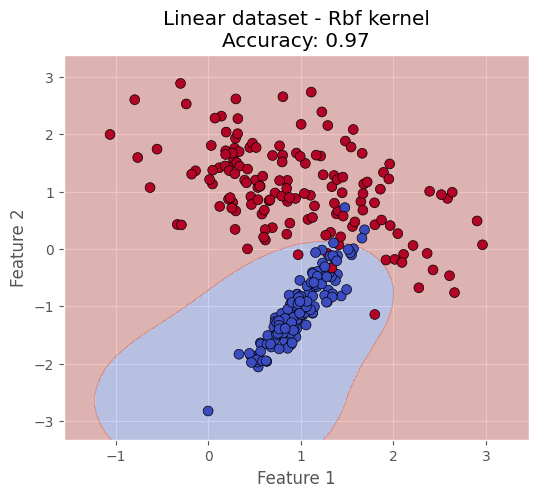

Environment ready!

=== Moons Dataset ===
Linear kernel accuracy: 0.90


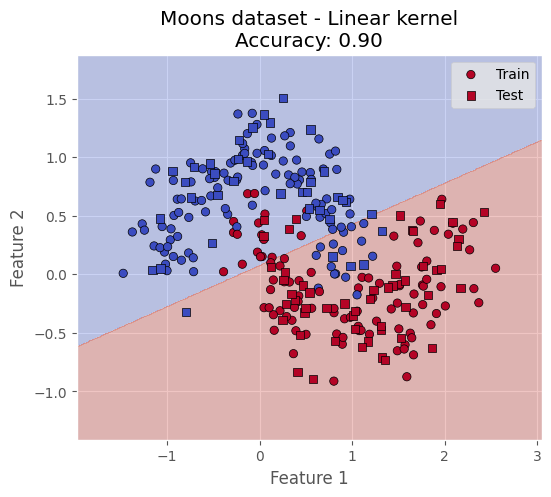

Poly kernel accuracy: 0.83


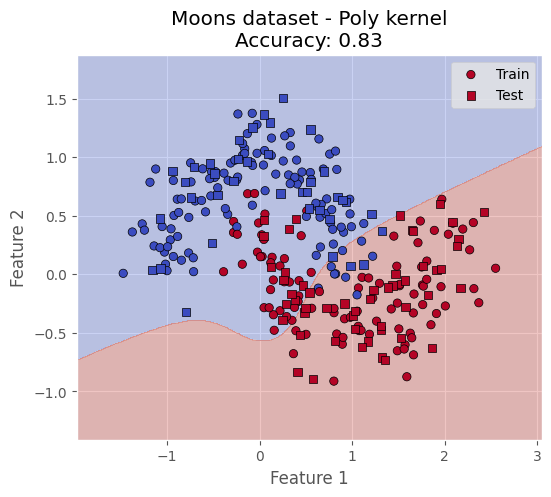

Rbf kernel accuracy: 0.92


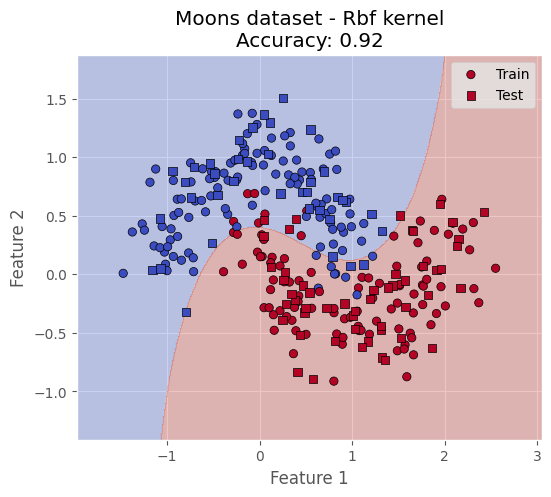


=== Circles Dataset ===
Linear kernel accuracy: 0.42


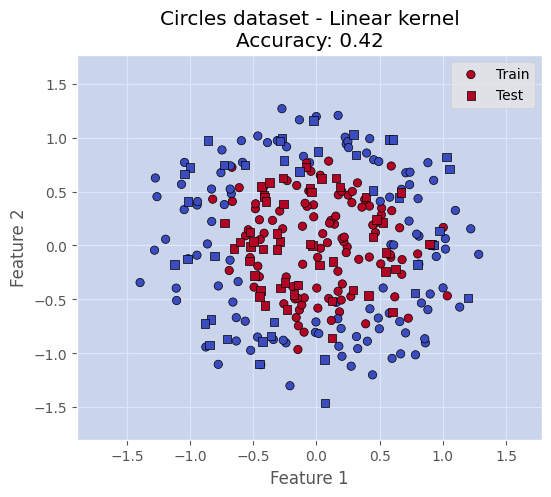

Poly kernel accuracy: 0.42


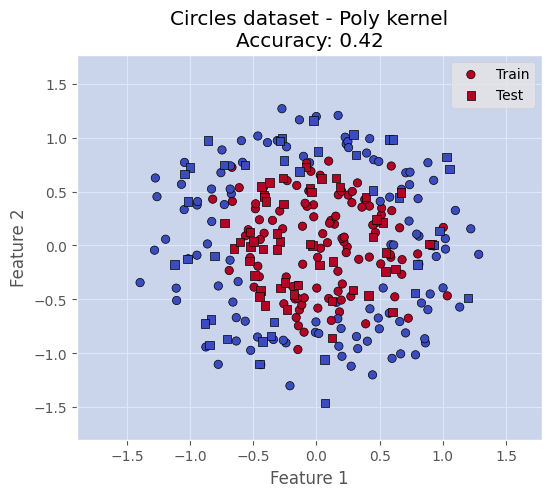

Rbf kernel accuracy: 0.92


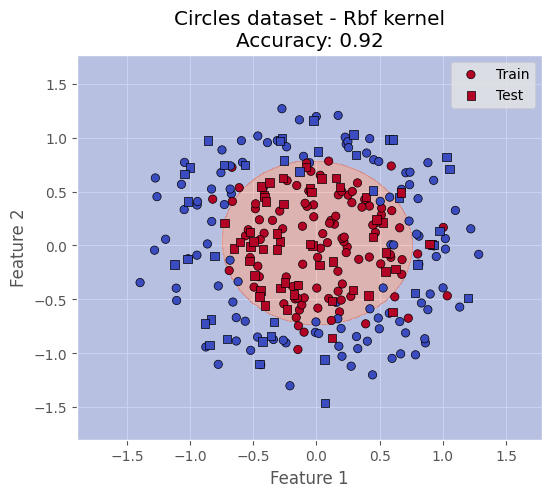


=== Linear Dataset ===
Linear kernel accuracy: 0.96


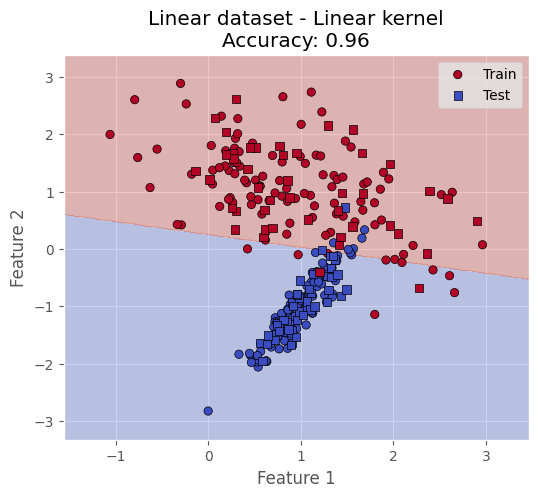

Poly kernel accuracy: 0.90


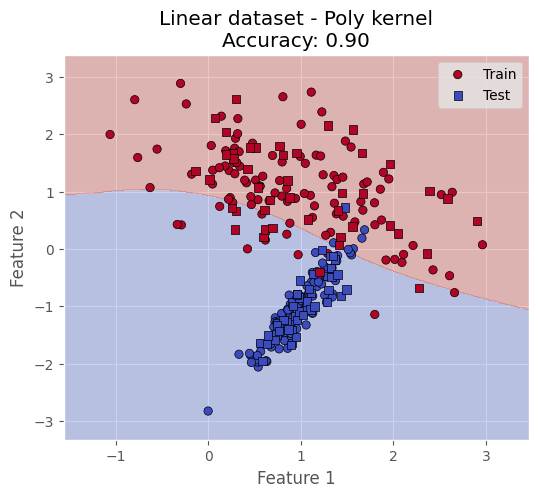

Rbf kernel accuracy: 0.97


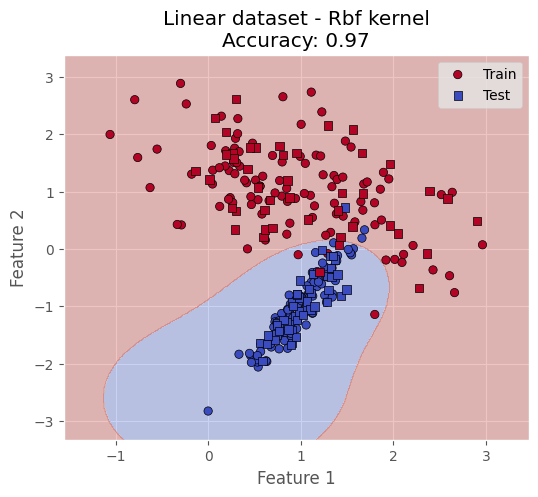

In [10]:
# ======================================================
# SVM Tutorial Notebook - Enhanced for Rubric
# ======================================================

# 1. Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Use built-in matplotlib style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (6,5)

print("Environment ready!")

# 2. Create datasets
X_moons, y_moons = make_moons(n_samples=300, noise=0.2, random_state=42)
X_circles, y_circles = make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=42)
X_linear, y_linear = make_classification(n_samples=300, n_features=2, 
                                         n_redundant=0, n_informative=2,
                                         n_clusters_per_class=1, random_state=42)

datasets = [
    ("Moons", X_moons, y_moons),
    ("Circles", X_circles, y_circles),
    ("Linear", X_linear, y_linear)
]

kernels = ["linear", "poly", "rbf"]

# 3. Function to plot SVM decision boundary
def plot_svm_decision_boundary(model, X_train, y_train, X_test, y_test, title):
    x_min, x_max = X_train[:,0].min() - 0.5, X_train[:,0].max() + 0.5
    y_min, y_max = X_train[:,1].min() - 0.5, X_train[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    
    # Training points
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k', marker='o', label='Train', cmap='coolwarm')
    # Test points
    plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k', marker='s', label='Test', cmap='coolwarm')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# 4. Train SVMs, print accuracy, and plot
for name, X, y in datasets:
    print(f"\n=== {name} Dataset ===")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for kernel in kernels:
        model = SVC(kernel=kernel, gamma='auto')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        
        print(f"{kernel.capitalize()} kernel accuracy: {acc:.2f}")

        filename = f"{name}_{kernel}_kernel.png"
        plot_svm_decision_boundary(model, X_train, y_train, X_test, y_test,
                                   title=f"{name} dataset - {kernel.capitalize()} kernel\nAccuracy: {acc:.2f}")
